# Connect drive

In [1]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# get FSD50k

In [2]:
import requests
import os
from concurrent.futures import ThreadPoolExecutor

def download_file(url, dest_folder):
  """
  Downloads a file from a given URL and saves it to a destination folder.

  Args:
  - url (str): The URL of the file to download.
  - dest_folder (str): The destination folder where the file should be saved.
  """
  if not os.path.exists(dest_folder):
    os.makedirs(dest_folder)

  response = requests.get(url, stream=True)
  filename = os.path.join(dest_folder, url.split('/')[-1])

  with open(filename, 'wb') as file:
    for chunk in response.iter_content(chunk_size=8192):
      file.write(chunk)

  return filename  # return the saved file path

def download_files_in_parallel(url_list, dest_folder):
  """
  Downloads files from a list of URLs in parallel and saves them to a destination folder.

  Args:
  - url_list (list): List of URLs to download.
  - dest_folder (str): The destination folder where files should be saved.

  Returns:
  - list: List of saved file paths.
  """
  with ThreadPoolExecutor() as executor:
    return list(executor.map(download_file, url_list, [dest_folder] * len(url_list)))

download_eval = True
download_dev = False

urls = []
if download_eval:
  print(f"downloading FSD50k eval dataset")
  urls.append('https://zenodo.org/record/4060432/files/FSD50K.eval_audio.z01')
  urls.append('https://zenodo.org/record/4060432/files/FSD50K.eval_audio.zip')

if download_dev:
  print(f"downloading FSD50k dev dataset")
  urls.append('https://zenodo.org/record/4060432/files/FSD50K.dev_audio.z01')
  urls.append('https://zenodo.org/record/4060432/files/FSD50K.dev_audio.z02')
  urls.append('https://zenodo.org/record/4060432/files/FSD50K.dev_audio.z03')
  urls.append('https://zenodo.org/record/4060432/files/FSD50K.dev_audio.z04')
  urls.append('https://zenodo.org/record/4060432/files/FSD50K.dev_audio.z05')
  urls.append('https://zenodo.org/record/4060432/files/FSD50K.dev_audio.zip')

downloaded_files = download_files_in_parallel(urls, "/content/")
print(downloaded_files)


downloading FSD50k eval dataset
['/content/FSD50K.eval_audio.z01', '/content/FSD50K.eval_audio.zip']


In [3]:
# decompress the eval set:
!zip -s 0 /content/FSD50K.eval_audio.zip --out unsplit.zip
!unzip unsplit.zip

Streaming output truncated to the last 5000 lines.
  inflating: FSD50K.eval_audio/109820.wav  
  inflating: FSD50K.eval_audio/323793.wav  
  inflating: FSD50K.eval_audio/18366.wav  
  inflating: FSD50K.eval_audio/365102.wav  
  inflating: FSD50K.eval_audio/64620.wav  
  inflating: FSD50K.eval_audio/172858.wav  
  inflating: FSD50K.eval_audio/250098.wav  
  inflating: FSD50K.eval_audio/171973.wav  
  inflating: FSD50K.eval_audio/402569.wav  
  inflating: FSD50K.eval_audio/189620.wav  
  inflating: FSD50K.eval_audio/137894.wav  
  inflating: FSD50K.eval_audio/390340.wav  
  inflating: FSD50K.eval_audio/405267.wav  
  inflating: FSD50K.eval_audio/135848.wav  
  inflating: FSD50K.eval_audio/369598.wav  
  inflating: FSD50K.eval_audio/110584.wav  
  inflating: FSD50K.eval_audio/97756.wav  
  inflating: FSD50K.eval_audio/236294.wav  
  inflating: FSD50K.eval_audio/369265.wav  
  inflating: FSD50K.eval_audio/93790.wav  
  inflating: FSD50K.eval_audio/344679.wav  
  inflating: FSD50K.eval_audi

# install dependencies, import them

In [4]:
!pip install torchaudio
!pip install torchinfo
!pip install essentia

!pip install git+https://github.com/BenjaminOlsen/SegSep.git
!pip install git+https://github.com/huggingface/transformers.git
#!pip install git+https://github.com/facebookresearch/segment-anything.git
!pip install git+https://github.com/BenjaminOlsen/segment-anything.git

!pip install mir_eval # todo! switch to museval

!pip install gdown

!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 29.5 MB/s eta 0:00:00
  Cloning https://github.com/BenjaminOlsen/SegSep.git to /tmp/pip-req-build-7695f0ov
  Running command git clone --filter=blob:none --quiet https://github.com/BenjaminOlsen/SegSep.git /tmp/pip-req-build-7695f0ov
  Resolved https://github.com/BenjaminOlsen/SegSep.git to commit 4254f1ed487c90ebbc5378f14edaebb44c87496f
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for segsep: filename=segsep-0.0.1-py3-none-any.whl size=30183 sha256=af160d2269ed9ef398de812a55076789d30b8b6bcd7109b4b07c27e8287d0a03
  Stored in directory: /tmp/pip-ephem-wheel-cache-0kdn_vgy/wheels/a0/2f/8f/dba880539ed9d8ea8d5a0f672ac052bcc6403224eb0e504512
Successfully built segsep
  Cloning https://github.com/huggingface/transformers.git to /tmp/pip-req-build-ld3sc_in
  Running command git clone --filter=blob:none --quiet https://github.com/h

In [5]:
import os
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory

  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} files in '{dirpath}'.")

In [ ]:
import importlib
importlib.reload(segsep)

<module 'segsep' from '/usr/local/lib/python3.10/dist-packages/segsep/__init__.py'>

In [6]:
import pytz
import torch
import random
import segsep
import torchaudio
import importlib
import numpy as np
import essentia.standard as es
import matplotlib.pyplot as plt

from statistics import mean

from torchinfo import summary
from datetime import datetime

from segsep.utils import print_tensor_stats, calculate_energy, spectral_centroid_waveform, should_skip_chunk
from segsep.datasets import AudioPairDataset, generate_audio_metadata
from segsep.loss_acc import LOGL2loss_freq, si_snr, L2loss_freq, L1loss_freq, LOGL1loss_freq
from segsep.train_validate import train, validate
from segsep.sam_sep import SamWrapper

from segment_anything import sam_model_registry, SamPredictor

from mir_eval.separation import bss_eval_sources #todo: switch to museval

In [7]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [8]:

!gdown 11erbFCd-tlN4jRSdWjCynQ-1zfblU9y2 # eval_audio_metadata.json

Downloading...
From: https://drive.google.com/uc?id=11erbFCd-tlN4jRSdWjCynQ-1zfblU9y2
To: /content/eval_audio_metadata.json
100% 6.01M/6.01M [00:00<00:00, 190MB/s]


In [9]:
fsd_eval_location = '/content/FSD50K.eval_audio'
eval_metadata_json = '/content/eval_audio_metadata.json'

In [10]:
walk_through_dir(fsd_eval_location)

There are 0 directories and 10231 files in '/content/FSD50K.eval_audio'.


# testing dataset defintion

In [11]:
import os
import json
import torch
import random
import torchaudio
from tqdm.auto import tqdm
from pathlib import Path

from segsep.utils import spectral_metadata_waveform

# --------------------------------------------------------------------------------------------------
class _AudioPairDataset(torch.utils.data.Dataset):
  """
  this class defines a dataset which makes random mixtures of a given set of audio defined
  in a json file given in the constructor argument, according to certain conditions on the
  certain characteristics of the audio.

  Those characteristics are:
  1) a minimimum duration
  2) minimum difference in mean spectral centroid
  3) minimum difference in mean spectral bandwidth
  4) minimum difference in mean spectral contrast
  5) minimum difference in mean spectral flatness

  The default values are taken as the mean standard deviation of the FSD dev dataset

  if the json metadata file doesn't exist, it tries to create it using generate_audio_metadata.

  It returns a mix, and the separate sources from its __getitem__ using the index as a
  random seed.

  dummy_mode creates a mix with the longer of the audios set to 0 for a more event-detection
  task
  """
  def __init__(self, audio_dir, json_path,
               centroid_diff_hz=2000.0,
               bandwidth_diff=1350.0,
               flatness_diff=0.16,
               contrast_diff=0.07,
               min_duration_s=11.0,
               dummy_mode=False):

    if json_path == None:
      json_path = 'AudioPairDataset_metadata.json'

    if not os.path.exists(json_path):
      print(f"creating {json_path}")
      generate_audio_metadata(audio_dir=audio_dir, output_file=json_path, verbose=True)

    with open(json_path, 'r') as f:
      self.data_all = json.load(f)

    self.audio_dir = audio_dir
    self.centroid_diff_hz = centroid_diff_hz
    self.bandwidth_diff = bandwidth_diff
    self.flatness_diff = flatness_diff
    self.contrast_diff = contrast_diff
    self.min_duration_s = min_duration_s
    self.data_long = [d for d in self.data_all if d['sample_cnt'] / d['sample_rate'] > min_duration_s]
    self.dummy_mode = dummy_mode


    if len(self.data_long) < 2:
      raise ValueError(f"Not enough tracks longer than {min_duration_s} seconds")

    print(f"found {len(self.data_long)} files of length {min_duration_s}s or longer")

    torch.manual_seed(0)  # You might want to fix the seed if you want consistent shuffling.
    random.shuffle(self.data_long)
    random.shuffle(self.data_all)

    print(f"AudioPairDataset init: counting audio pairs...")
    self.length = self.count_audio_pairs()
    print(f"...done")

  ####################################
  def load_audio(self, filename):
    try:
      waveform, sample_rate = torchaudio.load(filename)
      return waveform, sample_rate, filename
    except Exception as e:
      print(f"Error loading audio file {filename}: {e}")
      return None, None

  ####################################
  def audio_pair_satisfies_condition(self, idx_long, idx_all):
    info1 = self.data_long[idx_long]
    info2 =  self.data_all[idx_all]

    fn_1 = info1['filename']
    fn_2 = info2['filename']

    # look at distinct pairs only
    if fn_1 == fn_2:
      return False

    sc_1 = info1['spectral_centroid']['mean']
    sc_2 = info2['spectral_centroid']['mean']

    flat_1 = info1['spectral_flatness']['mean']
    flat_2 = info2['spectral_flatness']['mean']

    bw_1 = info1['spectral_bandwidth']['mean']
    bw_2 = info2['spectral_bandwidth']['mean']

    cont_1 = info1['spectral_contrast']['mean']
    cont_2 = info2['spectral_contrast']['mean']

    return (abs(sc_1 - sc_2) >= self.centroid_diff_hz and
            abs(flat_1 - flat_2) >= self.flatness_diff and
            abs(bw_1 - bw_2) >= self.bandwidth_diff and
            abs(cont_1 - cont_2) >= self.contrast_diff)

  ####################################
  def count_audio_pairs(self):
    count = 0
    for i in range(len(self.data_long)):
        for j in range(i + 1, len(self.data_all)):
          if self.audio_pair_satisfies_condition(i, j):
            count += 1

    return count

  ####################################
  def get_audio_pairs(self, idx):
    torch.manual_seed(idx)
    random.seed(idx)
    random.shuffle(self.data_long)
    random.shuffle(self.data_all)

    for i in range(len(self.data_long)):
      for j in range(i+1, len(self.data_all)):

        if self.audio_pair_satisfies_condition(idx_long=i, idx_all=j):
          waveform1, sample_rate1, filename1 = self.load_audio(os.path.join(self.audio_dir, self.data_long[i]['filename']))
          waveform2, sample_rate2, filename2 = self.load_audio(os.path.join(self.audio_dir, self.data_all[j]['filename']))

          if waveform1 is None or waveform2 is None:
            continue

          info1 = self.data_long[i]
          info2 = self.data_all[j]

          return waveform1, waveform2, info1, info2
    raise ValueError("No pair found with the required spectral centroid difference")

  ####################################
  def __getitem__(self, idx):
    mix, longer_audio, padded_audio, longer_info, shorter_info, pad_offset = self.get_info(idx)
    return mix, padded_audio

  ####################################
  def get_info(self, idx):
    x1, x2, info1, info2 = self.get_audio_pairs(idx)

    len1 = x1.shape[1]
    len2 = x2.shape[1]

    if len1 < len2:
      shorter_audio = x1
      longer_audio = x2
      longer_info = info2
      shorter_info= info1
    else:
      shorter_audio = x2
      longer_audio = x1
      longer_info = info1
      shorter_info = info2

    len_short = shorter_audio.shape[1]
    len_long = longer_audio.shape[1]

    # put the shorter audio at a random starting location within the longer
    pad_offset = random.randint(0, len_long-len_short)
    #print(f"padding audio1 {len_short} -> {len_long}: {len_long-len_short} offset {pad_offset}")
    padded_audio = torch.nn.functional.pad(shorter_audio, (pad_offset, len_long-len_short-pad_offset))

    if self.dummy_mode:
      longer_audio = torch.zeros(longer_audio.shape)
    mix = longer_audio + padded_audio

    return mix, longer_audio, padded_audio, longer_info, shorter_info, pad_offset

  ####################################
  def __len__(self):
    return self.length

# defining samwrapper2

In [14]:
import cv2
import torch
import torchaudio
import torch.nn.functional as F
import torchaudio.transforms as T
from transformers import SamModel, SamConfig
from segment_anything import sam_model_registry

# --------------------------------------------------------------------------------------------------
def tensor_to_uint8(tensor, min_val=0, max_val=255):
  """Normalize tensor to [min_val, max_val] range and convert to uint8."""
  # Linearly scale tensor values
  tensor = (tensor - tensor.min()) / (tensor.max() - tensor.min())
  tensor = tensor * (max_val - min_val) + min_val
  return tensor.byte()  # Convert to uint8 type

# --------------------------------------------------------------------------------------------------
class SamWrapper2(torch.nn.Module):
  def __init__(self,
               spec_dim=(1024, 1024),
               sample_rate=44100,
               resample_rate=22050):
    super().__init__()

    self.spec_dim = spec_dim
    self.n_fft = 2*(self.spec_dim[1]-1)
    self.win_length = self.n_fft
    self.hop_length = self.n_fft//8
    self.sample_rate = sample_rate
    self.resample_rate = resample_rate
    self.downsampler = T.Resample(orig_freq=self.sample_rate, new_freq=self.resample_rate)
    self.upsampler = T.Resample(orig_freq=self.resample_rate, new_freq=self.sample_rate)
    self.input_chunk_size = (self.sample_rate / self.resample_rate) * (self.spec_dim[0]-1) * self.hop_length

    if not self.input_chunk_size.is_integer():
      print(f"WARNING, noninteger input chunk size, choose your sample rate, resample rate to divide cleanly!")
    print(f"SamWrapper model n_fft: {self.n_fft}, win len: {self.win_length}, hop len: {self.hop_length}, sample/resample: {self.sample_rate / self.resample_rate} -> input_chunk_size {self.input_chunk_size}")

    self.input_chunk_size = int(self.input_chunk_size)

    # use facebook research repo directly

    sam_checkpoint = "sam_vit_h_4b8939.pth"
    model_type = "vit_h"
    self.sam_model = sam_model_registry[model_type](checkpoint=sam_checkpoint)
    self.predictor = SamPredictor(self.sam_model)

  # ---------------------------------------------------------------
  def encoder(self, x): # returns magnitude spectrum, phase spectrum
    x = self.downsampler(x)
    sample_cnt = x.shape[-1]
    ideal_hop_length = sample_cnt / (self.spec_dim[0] - 1)

    if not ideal_hop_length.is_integer():
      print(f"WARNING, choose audio chunk size to be integer multiple of hop_length {self.hop_length}! != {ideal_hop_length}")

    X = torch.stft( input=x,
                    n_fft=self.n_fft,
                    win_length=self.win_length,
                    window=torch.hann_window(self.win_length).to(x.device),
                    center=True,
                    hop_length=self.hop_length,
                    onesided=True,
                    return_complex=True)

    return X

  # ---------------------------------------------------------------
  def decoder(self, X): #takes complex spectrum, returns audio
    x = torch.istft( input=X,
                    n_fft=self.n_fft,
                    win_length=self.win_length,
                    window=torch.hann_window(self.win_length).to(X.device),
                    center=True,
                    hop_length=self.hop_length,
                    onesided=True,
                    return_complex=False)
    x = self.upsampler(x)
    return x

  # ---------------------------------------------------------------
  # returns predicted vocals:
  def forward(self,
              audio_in,
              input_points=None,
              point_labels=None,
              input_boxes=None,
              upscale_mask=False,
              debug=False):
    # normalize the audio
    mean = torch.mean(audio_in)
    std = torch.std(audio_in)
    audio_in = (audio_in - mean) / (std + 1e-8)

    if torch.isnan(audio_in).any():
      print("forward(): input audio contains nan after normalization!!!")

    # get the magnitude and phase spectra from the encoder (STFT)
    X = self.encoder(audio_in)
    input_spec_shape = X.shape

    mix_spec_in = torch.abs(X)
    phase_in = torch.angle(X)

    if debug:
      print(f"forward(): mix_spec {mix_spec_in.shape}, phase_in {phase_in.shape}")
    # make sure the tensors are in the correct shape for the backbone : 1024,1024
    if(mix_spec_in.shape[1] != 1024 or mix_spec_in.shape[2] != 1024):
      if debug:
        print(f"forward(): interpolating input mix spec from {mix_spec_in.shape} to (3,1024,1024)")
      mix_spec_in_transformed = torch.nn.functional.interpolate(mix_spec_in.unsqueeze(0), size=(1024,1024), mode='bilinear').squeeze(0)
    else:
      if debug:
        print(f"forward(): input mix spec from {mix_spec_in.shape} already correct shape for model")
      mix_spec_in_transformed = mix_spec_in

    # convert the spectrogram into a uint8 image
    spec_img = tensor_to_uint8(mix_spec_in_transformed)

    if debug:
      print(f"forward(): mix_spec_in.shape: {mix_spec_in.shape}; mix_spec_in_transformed.shape: {mix_spec_in_transformed.shape}; spec_img.shape {spec_img.shape}")

    # calculates the image embeddings:
    self.predictor.set_image(spec_img)

    # runs the image imbeddings through the mask decoder and returns the masks
    masks, iou_scores, low_res_logits = self.predictor.predict_torch(
                                              point_coords=input_points,
                                              point_labels=point_labels,
                                              multimask_output=True,
                                              return_logits=False
                                              )

    #print(f"sam_model iou_scores: {outputs.iou_scores.shape}; {outputs.iou_scores}")
    #img_embeddings = self.sam_model.vision_encoder(mix_spec_in.unsqueeze(0))
    #print(f"img_embeddings.last_hidden_state.shap: {img_embeddings.last_hidden_state.shape}")
    #mask = self.sam_model.mask_decoder(img_embeddings.last_hidden_state)
    #print(f"mask decoder output: {mask}")

    pred_masks = low_res_logits.squeeze()

    if debug:
      print(f"forward(): sam_model outputs masks shape: {masks.shape}; pred_masks.shape: {pred_masks.shape}")


    if mix_spec_in.shape != pred_masks.shape:
      if debug:
        print(f"mix spec in shape: {mix_spec_in.shape} != pred_masks.shape: {pred_masks.shape}")
      if upscale_mask: # upscale the predicted mask to the size of the input spectrum

        upscale_size = (mix_spec_in.shape[1], mix_spec_in.shape[2])
        if debug:
            print(f"forward(): upscaling predicted mask from {pred_masks.shape} to {upscale_size}")

        pred_masks = torch.nn.functional.interpolate(pred_masks.unsqueeze(0), size=upscale_size, mode='bilinear').squeeze(0)

        # filter the predicted mask with the original mix spectrum magnitude
        if debug:
          print(f"forward(): multiplying pred mask {pred_masks.shape} and mix spec {mix_spec_in.shape}")
        pred_mag = torch.mul(pred_masks, mix_spec_in)


      else : # downscale the input spectrum to predicted magnitude spectrum's size
        kernel_size = (2,2) # ...first do a average pooling
        mix_spec_avg_pool = torch.nn.functional.avg_pool2d(mix_spec_in, kernel_size)
        downscale_size = (pred_masks.shape[1], pred_masks.shape[2])

        downscaled_mix_spec = torch.nn.functional.interpolate(mix_spec_in.unsqueeze(0), size=downscale_size, mode='bilinear').squeeze(0)

        if debug:
          print(f"forward(): downscaling mix spec from {mix_spec_in.shape} -> avg pool {mix_spec_avg_pool.shape} -> interpolate {downscaled_mix_spec.shape}")

        pred_mag = torch.mul(pred_masks, downscaled_mix_spec)
    else:

      pred_mag = torch.mul(pred_masks, mix_spec_in)

    # resynthesize the estimated source audio
    if pred_mag.squeeze().shape != input_spec_shape:
      if debug:
        print(f"forward(): resizing predicted mag spec from {pred_mag.shape} to {input_spec_shape}")
      pred_mag = torch.nn.functional.interpolate(pred_mag.unsqueeze(0), size=(input_spec_shape[1], input_spec_shape[2]), mode='bilinear').squeeze(0)

    pred = (pred_mag * torch.cos(phase_in)) + (1.0j * pred_mag * torch.sin(phase_in))

    if debug:
      print(f"forward(): predicted spectrum shape: {pred.shape}")
    pred_audio = self.decoder(pred.squeeze())
    return pred_audio, mix_spec_in, phase_in, pred_mag, pred_masks.squeeze(), iou_scores.squeeze()


# define IDEAL model


In [39]:
import cv2
import torch
import torchaudio
import torch.nn.functional as F
import torchaudio.transforms as T
from transformers import SamModel, SamConfig
from segment_anything import sam_model_registry

# --------------------------------------------------------------------------------------------------
def tensor_to_uint8(tensor, min_val=0, max_val=255):
  """Normalize tensor to [min_val, max_val] range and convert to uint8."""
  # Linearly scale tensor values
  tensor = (tensor - tensor.min()) / (tensor.max() - tensor.min())
  tensor = tensor * (max_val - min_val) + min_val
  return tensor.byte()  # Convert to uint8 type

# --------------------------------------------------------------------------------------------------
class IdealModel(torch.nn.Module):
  def __init__(self,
               spec_dim=(1024, 1024),
               sample_rate=44100,
               resample_rate=22050):
    super().__init__()

    self.spec_dim = spec_dim
    self.n_fft = 2*(self.spec_dim[1]-1)
    self.win_length = self.n_fft
    self.hop_length = self.n_fft//8
    self.sample_rate = sample_rate
    self.resample_rate = resample_rate
    self.downsampler = T.Resample(orig_freq=self.sample_rate, new_freq=self.resample_rate)
    self.upsampler = T.Resample(orig_freq=self.resample_rate, new_freq=self.sample_rate)
    self.input_chunk_size = (self.sample_rate / self.resample_rate) * (self.spec_dim[0]-1) * self.hop_length

    if not self.input_chunk_size.is_integer():
      print(f"WARNING, noninteger input chunk size, choose your sample rate, resample rate to divide cleanly!")
    print(f"IdealModel model n_fft: {self.n_fft}, win len: {self.win_length}, hop len: {self.hop_length}, sample/resample: {self.sample_rate / self.resample_rate} -> input_chunk_size {self.input_chunk_size}")

    self.input_chunk_size = int(self.input_chunk_size)



  # ---------------------------------------------------------------
  def encoder(self, x): # returns magnitude spectrum, phase spectrum
    x = self.downsampler(x)
    sample_cnt = x.shape[-1]
    ideal_hop_length = sample_cnt / (self.spec_dim[0] - 1)

    if not ideal_hop_length.is_integer():
      print(f"WARNING, choose audio chunk size to be integer multiple of hop_length {self.hop_length}! != {ideal_hop_length}")

    X = torch.stft( input=x,
                    n_fft=self.n_fft,
                    win_length=self.win_length,
                    window=torch.hann_window(self.win_length).to(x.device),
                    center=True,
                    hop_length=self.hop_length,
                    onesided=True,
                    return_complex=True)

    return X

  # ---------------------------------------------------------------
  def decoder(self, X): #takes complex spectrum, returns audio
    x = torch.istft( input=X,
                    n_fft=self.n_fft,
                    win_length=self.win_length,
                    window=torch.hann_window(self.win_length).to(X.device),
                    center=True,
                    hop_length=self.hop_length,
                    onesided=True,
                    return_complex=False)
    x = self.upsampler(x)
    return x

  # ---------------------------------------------------------------
  # returns predicted vocals:
  def forward(self,
              audio_in,
              source_audio,
              input_points=None,
              point_labels=None,
              input_boxes=None,
              upscale_mask=False,
              debug=False):

    # normalize the audio
    mean = torch.mean(audio_in)
    std = torch.std(audio_in)
    audio_in = (audio_in - mean) / (std + 1e-8)

    if torch.isnan(audio_in).any():
      print("forward(): input audio contains nan after normalization!!!")

    # get the magnitude and phase spectra from the encoder (STFT)
    X = self.encoder(audio_in)
    input_spec_shape = X.shape

    mix_spec_in = torch.abs(X)
    phase_in = torch.angle(X)

    # make sure the tensors are in the correct shape for the backbone : 1024,1024
    if(mix_spec_in.shape[1] != 1024 or mix_spec_in.shape[2] != 1024):
      mix_spec_in_transformed = torch.nn.functional.interpolate(mix_spec_in.unsqueeze(0), size=(1024,1024), mode='bilinear').squeeze(0)
    else:
      mix_spec_in_transformed = mix_spec_in

    # OH! great prediction!
    mean = torch.mean(source_audio)
    std = torch.std(source_audio)
    source_audio = (source_audio - mean) / (std + 1e-8)
    pred_mag = torch.abs(self.encoder(source_audio))

    # resynthesize the estimated source audio
    if pred_mag.squeeze().shape != input_spec_shape:
      pred_mag = torch.nn.functional.interpolate(pred_mag.unsqueeze(0), size=(input_spec_shape[1], input_spec_shape[2]), mode='bilinear').squeeze(0)

    pred = (pred_mag * torch.cos(phase_in)) + (1.0j * pred_mag * torch.sin(phase_in))
    pred_audio = self.decoder(pred.squeeze())
    return pred_audio


# instantiate ideal model

In [40]:
ideal_model = IdealModel(spec_dim=(1024,1024),
                   sample_rate=44100,
                   resample_rate=22050)

IdealModel model n_fft: 2046, win len: 2046, hop len: 255, sample/resample: 2.0 -> input_chunk_size 521730.0


# Load model checkpoint

In [12]:
SAM0 = SamWrapper(spec_dim=(1024,1024),
                   sample_rate=44100,
                   resample_rate=22050)
SAM2 = SamWrapper(spec_dim=(1024,1024),
                   sample_rate=44100,
                   resample_rate=22050)
SAM3 = SamWrapper(spec_dim=(1024,1024),
                   sample_rate=44100,
                   resample_rate=22050)
SAM4 = SamWrapper(spec_dim=(1024,1024),
                   sample_rate=44100,
                   resample_rate=22050)
checkpoint_name = "SAM_ZERO_SHOT"

load_saved_model = True

if load_saved_model:
  #checkpoint_dir = '/content/drive/MyDrive/models/'
  checkpoint_dir = '/content/drive/MyDrive/models_downloaded/'
  checkpoint_name = 'best_mask_decoder_AFTER_vision_encoder_finetune_run_4-LOGL2loss_freq-lr_1e-05.pth'
  #checkpoint_name = 'intermediate_epoch_19_SAM_mask_decoder_AND_vision_encoder_finetune_run_8-LOGL2loss_freq-lr_1e-05.pth'
  #checkpoint_name = 'best_SAM2_mask_decoder_finetune_run_17-LOGL2loss_freq-lr_1e-05.pth'
  #checkpoint_name = 'best_SAM_vision_encoder_finetune_run_14_bilinear-LOGL2loss_freq-lr_1e-05.pth'
  checkpoint_path = os.path.join(checkpoint_dir, checkpoint_name)

  print(f"loading {checkpoint_path}")
  checkpoint = torch.load(checkpoint_path)
  model.load_state_dict(checkpoint['model_state_dict'])
  model.to(device)

SamWrapper model n_fft: 2046, win len: 2046, hop len: 255, sample/resample: 2.0 -> input_chunk_size 521730.0


loading /content/drive/MyDrive/models_downloaded/best_mask_decoder_AFTER_vision_encoder_finetune_run_4-LOGL2loss_freq-lr_1e-05.pth


In [13]:
print(f"loaded checkpoint : {checkpoint_name}")

loaded checkpoint : best_mask_decoder_AFTER_vision_encoder_finetune_run_4-LOGL2loss_freq-lr_1e-05.pth


# instantiate datasets:

In [14]:
centroid_std = 1305.68
bandwidth_std = 996.263
flatness_std = 0.1054
contrast_std = 0.0565

easy_dataset = AudioPairDataset(audio_dir=fsd_eval_location,
                           json_path=eval_metadata_json,
                           centroid_diff_hz=2*centroid_std,
                           bandwidth_diff=2*bandwidth_std,
                           flatness_diff=2*flatness_std,
                           contrast_diff=2*contrast_std,
                           min_duration_s = model.input_chunk_size/model.resample_rate,
                           dummy_mode=False)

medium_dataset = AudioPairDataset(audio_dir=fsd_eval_location,
                           json_path=eval_metadata_json,
                           centroid_diff_hz=centroid_std,
                           bandwidth_diff=bandwidth_std,
                           flatness_diff=flatness_std,
                           contrast_diff=contrast_std,
                           min_duration_s = model.input_chunk_size/model.resample_rate,
                           dummy_mode=False)

hard_dataset = AudioPairDataset(audio_dir=fsd_eval_location,
                           json_path=eval_metadata_json,
                           centroid_diff_hz=0.0,
                           bandwidth_diff=0.0,
                           flatness_diff=0.0,
                           contrast_diff=0.0,
                           min_duration_s = model.input_chunk_size/model.resample_rate,
                           dummy_mode=False)



found 913 files of length 23.66122448979592s or longer
AudioPairDataset init: counting audio pairs...
...done
found 913 files of length 23.66122448979592s or longer
AudioPairDataset init: counting audio pairs...
...done
found 913 files of length 23.66122448979592s or longer
AudioPairDataset init: counting audio pairs...
...done


# instantiate dataloaders

In [15]:
easy_dataloader = torch.utils.data.DataLoader(dataset=easy_dataset,
                                                batch_size=1,
                                                num_workers=0,
                                                shuffle=True)

medium_dataloader = torch.utils.data.DataLoader(dataset=medium_dataset,
                                                batch_size=1,
                                                num_workers=0,
                                                shuffle=True)

hard_dataloader = torch.utils.data.DataLoader(dataset=hard_dataset,
                                                batch_size=1,
                                                num_workers=0,
                                                shuffle=True)

# poking around the datasets

In [ ]:
easy_size, easy_unsize = easy_dataset.count_audio_pairs2()
print(f"easy size {easy_size}, easy unsize {easy_unsize}")
med_size, med_unsize  = medium_dataset.count_audio_pairs2()
print(f"med size {med_size}, med unsize {med_unsize}")
hard_size, hard_unsize = hard_dataset.count_audio_pairs2()
print(f"hard size {hard_size}, hard unsize {hard_unsize}")

print(f"easy size: {easy_size:.3e}, med size: {med_size:.3e}; hard size: {hard_size:.3e}")

easy size 2757735, easy unsize 43408514
med size 11297260, med unsize 34868989
hard size 46161736, hard unsize 4513
easy size: 2.758e+06, med size: 1.130e+07; hard size: 4.616e+07


In [ ]:
len(hard_dataset), len(medium_dataset), len(easy_dataset)

(46161765, 11271188, 2770808)

In [ ]:
easy_size + easy_unsize, med_size + med_unsize, hard_size + hard_unsize

(46166249, 46166249, 46166249)

In [ ]:
k = len(easy_dataset.data_all)*len(easy_dataset.data_long)
print(f"{k:.4e}")

6.8742e+07


In [ ]:
from math import sqrt, comb
l1 = sqrt(46161755)
l2 = len(hard_dataset)
l3 = len(medium_dataset)
l4 = len(easy_dataset)
l1,l2,l3,l4

(6794.244255250174, 6719, 6719, 6719)

In [ ]:
N = len(easy_dataset.data_all)
print(f"{N} choose 2: {comb(N, 2):.2E}")


10231 choose 2: 5.23E+07


# get sample from dataset and plot it

choosing idx 1238; long: /content/FSD50K.eval_audio/255811.wav, short: /content/FSD50K.eval_audio/369619.wav
mix len: torch.Size([1, 314529]), longer: torch.Size([1, 314529]), shorter: torch.Size([1, 314529]), long info: {'sample_rate': 44100, 'filename': '/content/FSD50K.eval_audio/255811.wav', 'spectral_centroid': 763.7401743484153, 'sample_cnt': 314529}, short info: {'sample_rate': 44100, 'filename': '/content/FSD50K.eval_audio/369619.wav', 'spectral_centroid': 8352.747199268115, 'sample_cnt': 58692}, offset: 86934
trimming 215295 samples = 4.8820s: (7.1322s -> 2.2502s) from  audio to fit into model chunk
trimming 215295 samples from padded audio to fit into model chunk
plenty of energy in shorter audio chunk idx 0->99234


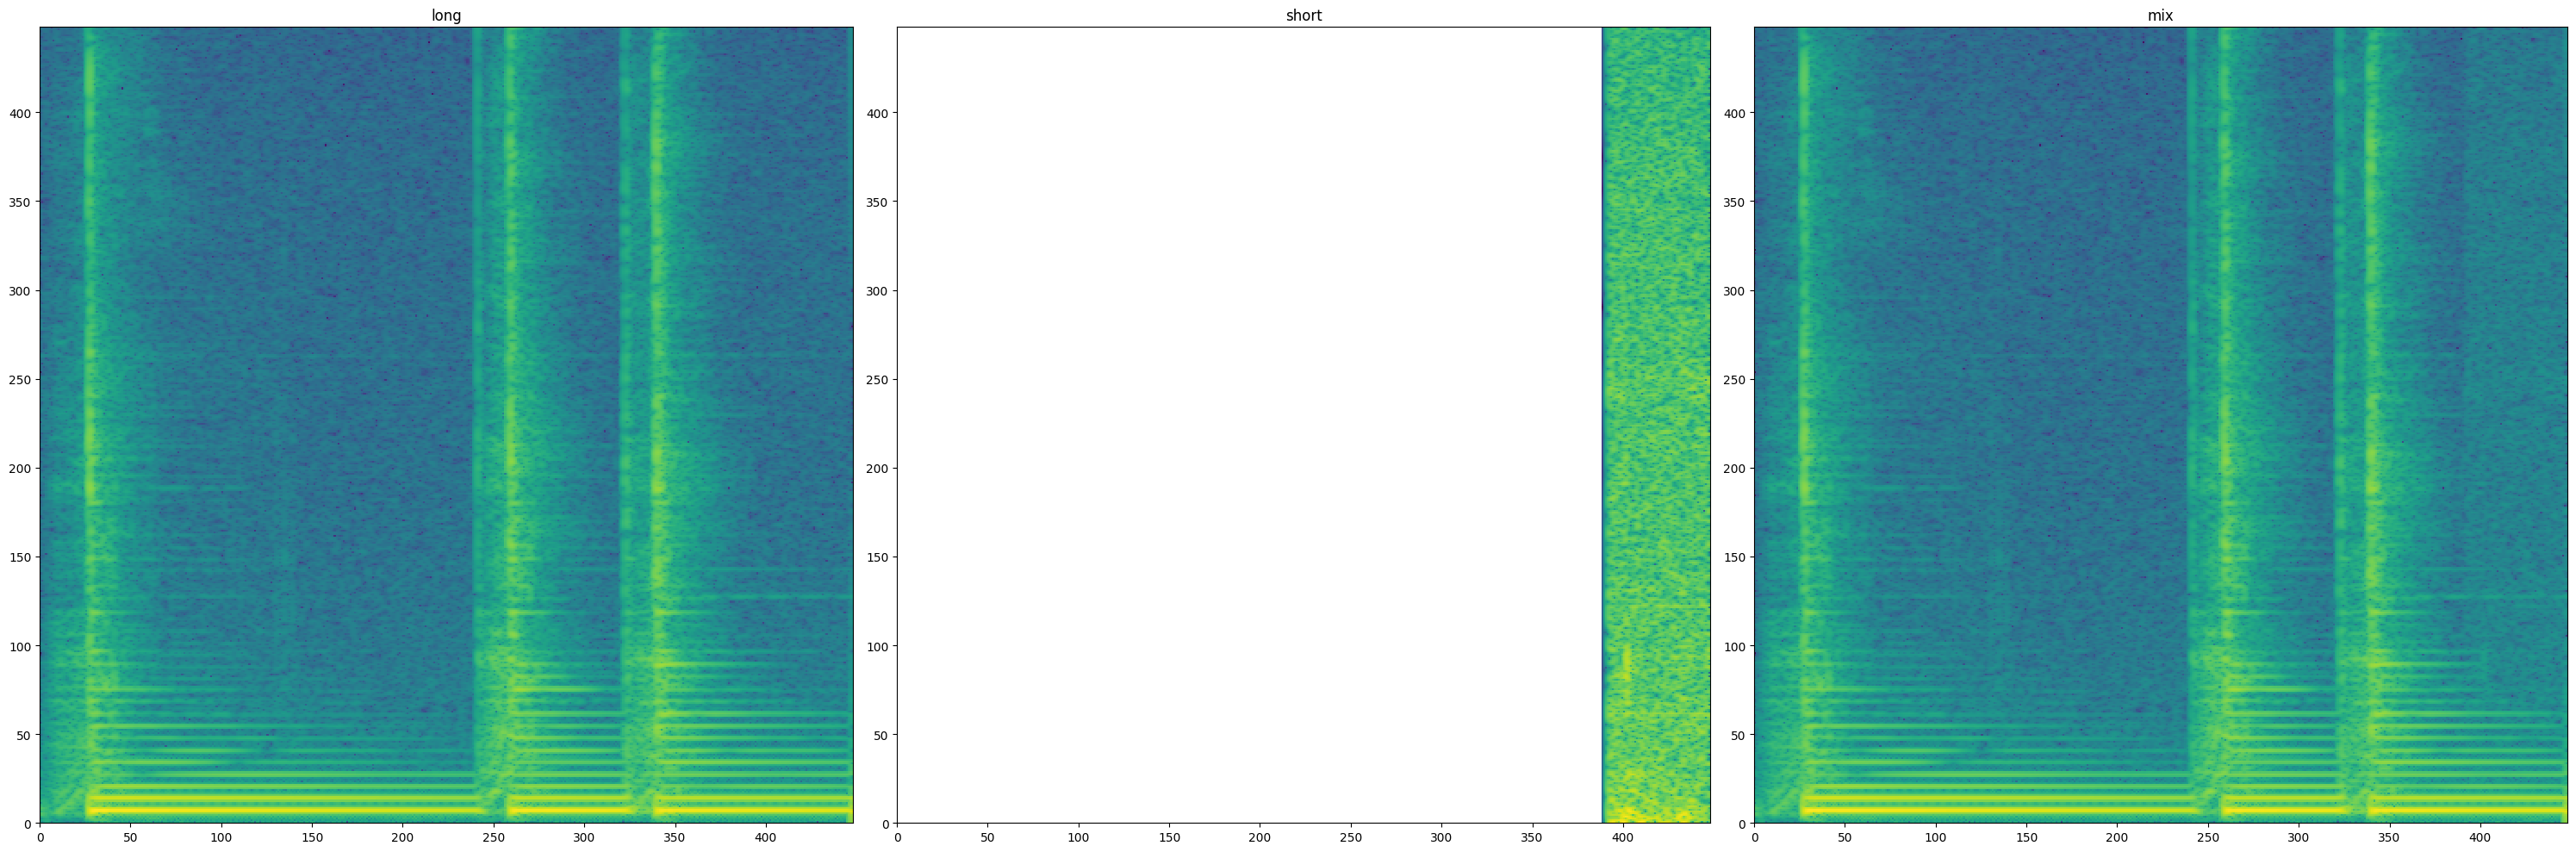

In [ ]:
rand_idx = random.randint(0, len(easy_dataset)-1)

mix, longer_audio, padded_audio, info_long, info_short, pad_offset = easy_dataset.get_info(rand_idx)
print(f'choosing idx {rand_idx}; long: {info_long["filename"]}, short: {info_short["filename"]}')

sr_l = info_long["sample_rate"]
sr_s = info_short["sample_rate"]
if (sr_l != sr_s):
  print(f"watch out, sample rate difference between audios: {sr_l} vs. {sr_s}")

# sample rate
sr=sr_l

print(f"mix len: {mix.shape}, longer: {longer_audio.shape}, shorter: {padded_audio.shape}, long info: {info_long}, short info: {info_short}, offset: {pad_offset}")

with torch.inference_mode():
  # trim input audio to ideal chunk size
  start_idx = 0
  while start_idx < mix.shape[1] - model.input_chunk_size:

    mix_chunk = mix[:, start_idx:start_idx+model.input_chunk_size]
    longer_audio_chunk = longer_audio[:,  start_idx:start_idx+model.input_chunk_size]

    #just for info about how much trimming is going on
    trim_size_l = longer_audio.shape[1] - model.input_chunk_size
    print(f"trimming {trim_size_l} samples = {trim_size_l/sr:.4f}s: ({longer_audio.shape[1]/sr:.4f}s -> {longer_audio_chunk.shape[1]/sr:.4f}s) from  audio to fit into model chunk")

    padded_audio_chunk = padded_audio[:, start_idx:start_idx+model.input_chunk_size]
    print(f"trimming {padded_audio.shape[1] - model.input_chunk_size} samples from padded audio to fit into model chunk")

    if should_skip_chunk(padded_audio_chunk):
      print(f"no energy in shorter audio chunk idx {start_idx}->{start_idx+model.input_chunk_size}")
      start_idx += model.input_chunk_size
    else:
      print(f"plenty of energy in shorter audio chunk idx {start_idx}->{start_idx+model.input_chunk_size}")
      break

  # if, finally, there is still nothing in the padded audio chunk, there's a problem
  if should_skip_chunk(padded_audio_chunk):
    print(f"NO audio energy in shorter audio! check yourself")

  # get the spectra for the different chunks
  spec_mix = model.encoder(mix_chunk.to(device))[0]
  spec_long = model.encoder(longer_audio_chunk.to(device))[0]
  spec_short = model.encoder(padded_audio_chunk.to(device))[0]

  # plot input audio:
  fig, axs = plt.subplots(1, 3, figsize=(30,10))

  axs[0].pcolormesh(10*torch.log10(spec_long.squeeze()).detach().cpu())
  axs[0].set_title('long')

  axs[1].pcolormesh(10*torch.log10(spec_short.squeeze()).detach().cpu())
  axs[1].set_title('short')
  dr = model.sample_rate / model.resample_rate #downsample ratio

  axs[1].plot

  axs[2].pcolormesh(10*torch.log10(spec_mix.squeeze()).detach().cpu())
  axs[2].set_title('mix')


  plt.tight_layout()
  plt.show()

# Define validation function

In [ ]:
!pip install museval

In [21]:
def get_stats(arr):
  mean = np.mean(arr)
  max = np.max(arr)
  min = np.min(arr)
  std = np.std(arr)
  return max, min, mean, std

In [16]:
from tqdm.auto import tqdm
import mir_eval
from torch.utils.data import SubsetRandomSampler


# --------------------------------------------------------------------------------------------------
def _validate_sam(model, dataloader, device, upscale_mask=True, verbose=False):

  sdr_arr = []
  sir_arr = []
  sar_arr = []

  model.eval()

  with torch.inference_mode():

    subset_sample_cnt = int(600)
    subset_indices = torch.randperm(len(dataloader))[:subset_sample_cnt]
    subset_sampler = SubsetRandomSampler(subset_indices)
    subset_dataloader = torch.utils.data.DataLoader(dataloader.dataset,
                                                    batch_size=dataloader.batch_size,
                                                    sampler=subset_sampler,
                                                    num_workers=dataloader.num_workers,
                                                    pin_memory=dataloader.pin_memory)

    # choose chunks of audio of chunk_size samples such that
    # each chunk results in a STFT of model.spec_dim[0] time bins
    hop_len = model.hop_length
    hop_cnt = model.spec_dim[0]
    chunk_size = model.input_chunk_size

    #print(f"choosing audio of {chunk_size} samples -> {chunk_size/model.resample_rate:.5f}s")
    ##############################################################################################
    for idx, (mix_audio, source_audio) in enumerate(tqdm(subset_dataloader)):
      # add a 3rd channel to each audio tensor:
      if source_audio.shape[1] == 2:
        source_audio_ch3=(source_audio[:,0]-source_audio[:,1]).unsqueeze(0)
        source_audio = torch.cat((source_audio, source_audio_ch3), dim=1)
      elif source_audio.shape[1] == 1:
          source_audio = torch.cat((source_audio, source_audio, source_audio), dim=1)
      if mix_audio.shape[1] == 2:
        mix_audio_ch3=(mix_audio[:,0]-mix_audio[:,1]).unsqueeze(0)
        mix_audio = torch.cat((mix_audio, mix_audio_ch3), dim=1)
      elif mix_audio.shape[1] == 1:
        mix_audio = torch.cat((mix_audio, mix_audio, mix_audio), dim=1)

      track_loss = 0
      track_acc = 0
      chunk_cnt = 0
      skip_chunk_cnt = 0
      sample_cnt = mix_audio.shape[2] # [batch, channel, audio]

      mix_audio = mix_audio.squeeze().to(device)
      source_audio = source_audio.squeeze().to(device)

      track_sdr_arr = []
      track_sir_arr = []
      track_sar_arr = []

      # omit last chunk if its size would be less than chunk_size
      for start_idx in range(0, sample_cnt-chunk_size+1, chunk_size):
        end_idx = start_idx + chunk_size
        mix_chunk = mix_audio[:, start_idx:end_idx]
        source_chunk = source_audio[:, start_idx:end_idx]
        #print(f"doing idx {start_idx}:{end_idx} - {float(end_idx)/mix_audio.shape[1]:.3f}")

        if should_skip_chunk(mix_chunk) or should_skip_chunk(source_chunk):
          skip_chunk_cnt += 1
          continue

        #print(f"mix chunk shape {mix_chunk.shape}")
        if torch.isnan(mix_chunk).any():
          print("input data contains nan!")
          continue
          #mix_chunk = torch.nan_to_num(mix_chunk)
        pred_audio, mix_spec_in, phase_in, pred_mag, upscaled_pred_mask, iou_scores = model(audio_in=mix_chunk,
                                                                                            upscale_mask=upscale_mask)
        if torch.isnan(pred_audio).any():
          print("predicted audio contains nan!")
          continue
        trim_idx = min(pred_audio.shape[1], source_chunk.shape[1])

        # calculate source separation evaluation metrics on AUDIO
        #print(f"source chunk shape: {source_chunk.shape}, pred_audio.shape: {pred_audio.shape}")
        sdr, sir, sar, perm = mir_eval.separation.bss_eval_sources(source_chunk.cpu().numpy(), pred_audio.cpu().numpy(), compute_permutation=False)

        track_sdr_arr.append(sdr)
        track_sir_arr.append(sir)
        track_sar_arr.append(sar)

        chunk_cnt += 1

        # madre mia
        del pred_audio

      track_sdr_arr = np.nan_to_num(track_sdr_arr)
      track_sir_arr = np.nan_to_num(track_sir_arr)
      track_sar_arr = np.nan_to_num(track_sar_arr)

      mean_sdr = np.nan_to_num(np.mean(track_sdr_arr))
      mean_sir = np.nan_to_num(np.mean(track_sir_arr))
      mean_sar = np.nan_to_num(np.mean(track_sar_arr))

      sdr_arr.append(mean_sdr)
      sir_arr.append(mean_sir)
      sar_arr.append(mean_sar)

      del mix_audio
      del source_audio
      torch.cuda.empty_cache()
      if verbose:
        print(f"validate track {idx}/{len(subset_dataloader)} mean_sdr: {mean_sdr:.3e}, mean_sir: {mean_sir:.3e}, mean_sar: {mean_sar:.3e}, skip chunk cnt: {skip_chunk_cnt}/{chunk_cnt}")
  return sdr_arr, sir_arr, sar_arr

# define ideal validator

In [53]:
from tqdm.auto import tqdm
import mir_eval
from torch.utils.data import SubsetRandomSampler


# --------------------------------------------------------------------------------------------------
def _validate_ideal(model, dataloader, device, upscale_mask=True, verbose=False):

  sdr_arr = []
  sir_arr = []
  sar_arr = []

  model.eval()

  with torch.inference_mode():

    subset_sample_cnt = int(1000)
    subset_indices = torch.randperm(len(dataloader))[:subset_sample_cnt]
    subset_sampler = SubsetRandomSampler(subset_indices)
    subset_dataloader = torch.utils.data.DataLoader(dataloader.dataset,
                                                    batch_size=dataloader.batch_size,
                                                    sampler=subset_sampler,
                                                    num_workers=dataloader.num_workers,
                                                    pin_memory=dataloader.pin_memory)

    # choose chunks of audio of chunk_size samples such that
    # each chunk results in a STFT of model.spec_dim[0] time bins
    hop_len = model.hop_length
    hop_cnt = model.spec_dim[0]
    chunk_size = model.input_chunk_size

    #print(f"choosing audio of {chunk_size} samples -> {chunk_size/model.resample_rate:.5f}s")
    ##############################################################################################
    for idx, (mix_audio, source_audio) in enumerate(tqdm(subset_dataloader)):
      # add a 3rd channel to each audio tensor:
      if source_audio.shape[1] == 2:
        source_audio_ch3=(source_audio[:,0]-source_audio[:,1]).unsqueeze(0)
        source_audio = torch.cat((source_audio, source_audio_ch3), dim=1)
      elif source_audio.shape[1] == 1:
          source_audio = torch.cat((source_audio, source_audio, source_audio), dim=1)
      if mix_audio.shape[1] == 2:
        mix_audio_ch3=(mix_audio[:,0]-mix_audio[:,1]).unsqueeze(0)
        mix_audio = torch.cat((mix_audio, mix_audio_ch3), dim=1)
      elif mix_audio.shape[1] == 1:
        mix_audio = torch.cat((mix_audio, mix_audio, mix_audio), dim=1)

      track_loss = 0
      track_acc = 0
      chunk_cnt = 0
      skip_chunk_cnt = 0
      sample_cnt = mix_audio.shape[2] # [batch, channel, audio]

      mix_audio = mix_audio.squeeze()
      source_audio = source_audio.squeeze()

      track_sdr_arr = []
      track_sir_arr = []
      track_sar_arr = []

      # omit last chunk if its size would be less than chunk_size
      for start_idx in range(0, sample_cnt-chunk_size+1, chunk_size):
        end_idx = start_idx + chunk_size
        mix_chunk = mix_audio[:, start_idx:end_idx]
        source_chunk = source_audio[:, start_idx:end_idx]
        #print(f"doing idx {start_idx}:{end_idx} - {float(end_idx)/mix_audio.shape[1]:.3f}")

        if should_skip_chunk(mix_chunk) or should_skip_chunk(source_chunk):
          skip_chunk_cnt += 1
          continue

        #print(f"mix chunk shape {mix_chunk.shape}")
        if torch.isnan(mix_chunk).any():
          print("input data contains nan!")
          continue
          #mix_chunk = torch.nan_to_num(mix_chunk)
        pred_audio = model(audio_in=mix_chunk,
                            source_audio=source_chunk,
                            upscale_mask=upscale_mask)
        if torch.isnan(pred_audio).any():
          print("predicted audio contains nan!")
          continue
        trim_idx = min(pred_audio.shape[1], source_chunk.shape[1])

        # calculate source separation evaluation metrics on AUDIO
        #print(f"source chunk shape: {source_chunk.shape}, pred_audio.shape: {pred_audio.shape}")
        sdr, sir, sar, perm = mir_eval.separation.bss_eval_sources(source_chunk.numpy(), pred_audio.numpy(), compute_permutation=False)

        track_sdr_arr.append(sdr)
        track_sir_arr.append(sir)
        track_sar_arr.append(sar)

        chunk_cnt += 1

        # madre mia
        del pred_audio

      track_sdr_arr = np.nan_to_num(track_sdr_arr)
      track_sir_arr = np.nan_to_num(track_sir_arr)
      track_sar_arr = np.nan_to_num(track_sar_arr)

      mean_sdr = np.nan_to_num(np.mean(track_sdr_arr))
      mean_sir = np.nan_to_num(np.mean(track_sir_arr))
      mean_sar = np.nan_to_num(np.mean(track_sar_arr))

      sdr_arr.append(mean_sdr)
      sir_arr.append(mean_sir)
      sar_arr.append(mean_sar)

      del mix_audio
      del source_audio

      if verbose:
        print(f"validate track {idx}/{len(subset_dataloader)} mean_sdr: {mean_sdr:.3e}, mean_sir: {mean_sir:.3e}, mean_sar: {mean_sar:.3e}, skip chunk cnt: {skip_chunk_cnt}/{chunk_cnt}")
  return sdr_arr, sir_arr, sar_arr

# DO validate ideally

In [54]:
print(f"ideal_EASY validating {checkpoint_name}...")
ideal_easy_sdr_arr, ideal_easy_sir_arr, ideal_easy_sar_arr = _validate_ideal(ideal_model, dataloader=easy_dataloader, device=device, verbose=True)


ideal_easy_mean_sdr = np.mean(np.nan_to_num(ideal_easy_sdr_arr))
ideal_easy_mean_sir = np.mean(np.nan_to_num(ideal_easy_sir_arr))
ideal_easy_mean_sar = np.mean(np.nan_to_num(ideal_easy_sar_arr))

print(f"ideal : easy mean_sdr: {ideal_easy_mean_sdr}, mean_sir: {ideal_easy_mean_sir}, mean_sar: {ideal_easy_mean_sar}")


ideal_EASY validating best_mask_decoder_AFTER_vision_encoder_finetune_run_4-LOGL2loss_freq-lr_1e-05.pth...


  0%|          | 0/1000 [00:00<?, ?it/s]

validate track 0/1000 mean_sdr: 2.455e+01, mean_sir: 2.505e+02, mean_sar: 2.455e+01, skip chunk cnt: 0/2
validate track 1/1000 mean_sdr: 6.469e+00, mean_sir: 2.356e+02, mean_sar: 6.469e+00, skip chunk cnt: 1/1
validate track 2/1000 mean_sdr: 2.270e+01, mean_sir: 2.114e+02, mean_sar: 2.270e+01, skip chunk cnt: 1/1
validate track 3/1000 mean_sdr: 1.203e+01, mean_sir: 2.465e+02, mean_sar: 1.203e+01, skip chunk cnt: 0/2
validate track 4/1000 mean_sdr: 3.309e+01, mean_sir: 2.136e+02, mean_sar: 3.309e+01, skip chunk cnt: 0/2
validate track 5/1000 mean_sdr: 2.410e+01, mean_sir: 1.890e+02, mean_sar: 2.410e+01, skip chunk cnt: 0/2
validate track 6/1000 mean_sdr: 3.535e+01, mean_sir: 1.960e+02, mean_sar: 3.535e+01, skip chunk cnt: 0/2
validate track 7/1000 mean_sdr: 2.123e+01, mean_sir: 2.597e+02, mean_sar: 2.123e+01, skip chunk cnt: 0/2
validate track 8/1000 mean_sdr: 1.808e+01, mean_sir: 2.664e+02, mean_sar: 1.808e+01, skip chunk cnt: 0/2
validate track 9/1000 mean_sdr: 3.026e+01, mean_sir: 2.

In [55]:
print(f"ideal_MED validating {checkpoint_name}...")
ideal_med_sdr_arr, ideal_med_sir_arr, ideal_med_sar_arr = _validate_ideal(ideal_model, dataloader=medium_dataloader, device=device, verbose=True)

ideal_med_mean_sdr = np.mean(np.nan_to_num(ideal_med_sdr_arr))
ideal_med_mean_sir = np.mean(np.nan_to_num(ideal_med_sir_arr))
ideal_med_mean_sar = np.mean(np.nan_to_num(ideal_med_sar_arr))

print(f"ideal: med mean_sdr: {ideal_med_mean_sdr}, mean_sir: {ideal_med_mean_sir}, mean_sar: {ideal_med_mean_sar}")

ideal_MED validating best_mask_decoder_AFTER_vision_encoder_finetune_run_4-LOGL2loss_freq-lr_1e-05.pth...


  0%|          | 0/1000 [00:00<?, ?it/s]

validate track 0/1000 mean_sdr: 0.000e+00, mean_sir: 0.000e+00, mean_sar: 0.000e+00, skip chunk cnt: 2/0
validate track 1/1000 mean_sdr: 6.589e+00, mean_sir: 2.508e+02, mean_sar: 6.589e+00, skip chunk cnt: 0/2
validate track 2/1000 mean_sdr: 1.362e+01, mean_sir: 1.892e+02, mean_sar: 1.362e+01, skip chunk cnt: 0/2
validate track 3/1000 mean_sdr: 2.469e+01, mean_sir: 2.060e+02, mean_sar: 2.469e+01, skip chunk cnt: 0/2
validate track 4/1000 mean_sdr: 1.281e+01, mean_sir: 2.401e+02, mean_sar: 1.281e+01, skip chunk cnt: 0/2
validate track 5/1000 mean_sdr: -9.526e+00, mean_sir: 2.527e+02, mean_sar: -9.526e+00, skip chunk cnt: 0/2
validate track 6/1000 mean_sdr: 2.550e+01, mean_sir: 2.236e+02, mean_sar: 2.550e+01, skip chunk cnt: 1/1
validate track 7/1000 mean_sdr: 1.183e+01, mean_sir: 2.271e+02, mean_sar: 1.183e+01, skip chunk cnt: 1/1
validate track 8/1000 mean_sdr: 6.911e+00, mean_sir: 2.504e+02, mean_sar: 6.911e+00, skip chunk cnt: 1/1
validate track 9/1000 mean_sdr: 9.024e+00, mean_sir: 

In [56]:
print(f"ideal_HARD validating {checkpoint_name}...")
ideal_hard_sdr_arr, ideal_hard_sir_arr, ideal_hard_sar_arr = _validate_ideal(ideal_model, dataloader=hard_dataloader, device=device, verbose=True)

ideal_hard_mean_sdr = np.mean(ideal_hard_sdr_arr)
ideal_hard_mean_sir = np.mean(ideal_hard_sir_arr)
ideal_hard_mean_sar = np.mean(ideal_hard_sar_arr)

print(f"ideal: hard mean_sdr: {ideal_hard_mean_sdr}, mean_sir: {ideal_hard_mean_sir}, mean_sar: {ideal_hard_mean_sar}")

ideal_HARD validating best_mask_decoder_AFTER_vision_encoder_finetune_run_4-LOGL2loss_freq-lr_1e-05.pth...


  0%|          | 0/1000 [00:00<?, ?it/s]

validate track 0/1000 mean_sdr: 1.822e+01, mean_sir: 2.466e+02, mean_sar: 1.822e+01, skip chunk cnt: 1/1
validate track 1/1000 mean_sdr: 3.314e+01, mean_sir: 2.293e+02, mean_sar: 3.314e+01, skip chunk cnt: 0/2
validate track 2/1000 mean_sdr: 2.258e+01, mean_sir: 2.029e+02, mean_sar: 2.258e+01, skip chunk cnt: 1/1
validate track 3/1000 mean_sdr: 8.989e+00, mean_sir: 2.689e+02, mean_sar: 8.989e+00, skip chunk cnt: 0/2
validate track 4/1000 mean_sdr: 2.511e+01, mean_sir: 2.027e+02, mean_sar: 2.511e+01, skip chunk cnt: 1/1
validate track 5/1000 mean_sdr: -5.768e+00, mean_sir: 2.466e+02, mean_sar: -5.768e+00, skip chunk cnt: 0/2
validate track 6/1000 mean_sdr: 2.218e+01, mean_sir: 2.324e+02, mean_sar: 2.218e+01, skip chunk cnt: 0/2
validate track 7/1000 mean_sdr: 2.434e+01, mean_sir: 2.210e+02, mean_sar: 2.434e+01, skip chunk cnt: 1/1
validate track 8/1000 mean_sdr: 1.633e+01, mean_sir: 2.377e+02, mean_sar: 1.633e+01, skip chunk cnt: 0/2
validate track 9/1000 mean_sdr: 3.339e+01, mean_sir: 

In [57]:
ideal_easy_sdr_stats = get_stats(ideal_easy_sdr_arr)
ideal_easy_sir_stats = get_stats(ideal_easy_sir_arr)
ideal_easy_sar_stats = get_stats(ideal_easy_sar_arr)

ideal_med_sdr_stats = get_stats(ideal_med_sdr_arr)
ideal_med_sir_stats = get_stats(ideal_med_sir_arr)
ideal_med_sar_stats = get_stats(ideal_med_sar_arr)

ideal_hard_sdr_stats = get_stats(ideal_hard_sdr_arr)
ideal_hard_sir_stats = get_stats(ideal_hard_sir_arr)
ideal_hard_sar_stats = get_stats(ideal_hard_sar_arr)

print(f"IDEAL: easy_sdr_stats {ideal_easy_sdr_stats}, \neasy_sir_stats {ideal_easy_sir_stats}, \neasy_sar_stats {ideal_easy_sar_stats}, \nmed_sdr_stats {ideal_med_sdr_stats}, \nmed_sir_stats {ideal_med_sir_stats}, \nmed_sar_stats {ideal_med_sar_stats}, \nhard_sdr_stats {ideal_hard_sdr_stats}, \nhard_sir_stats {ideal_hard_sir_stats}, \nhard_sar_stats {ideal_hard_sar_stats}")

IDEAL: easy_sdr_stats (58.56253214573844, -24.583228418378827, 19.170432093758198, 14.82971967831407), 
easy_sir_stats (286.47473123208806, 0.0, 221.88024022848404, 40.599233311640724), 
easy_sar_stats (58.562532145738516, -24.583228418382532, 19.17043209307261, 14.829719677684109), 
med_sdr_stats (54.23432042672626, -18.73561541399167, 17.21410951251659, 13.534996731761261), 
med_sir_stats (283.97360255701113, 0.0, 217.79945449941744, 41.99454156406597), 
med_sar_stats (54.23432042671994, -18.73561541399393, 17.214109512452364, 13.534996731731491), 
hard_sdr_stats (54.954276031600045, -12.12814465317616, 15.33490334270971, 11.019806231420077), 
hard_sir_stats (287.01024608305363, 0.0, 213.57893465478443, 50.880725159543815), 
hard_sar_stats (54.95427603160638, -12.128144653176216, 15.334903342693357, 11.019806231431621)


In [58]:
ideal_easy_sdr_stats = get_stats(np.nan_to_num(ideal_easy_sdr_arr))
ideal_easy_sir_stats = get_stats(np.nan_to_num(ideal_easy_sir_arr))
ideal_easy_sar_stats = get_stats(np.nan_to_num(ideal_easy_sar_arr))

ideal_med_sdr_stats = get_stats(np.nan_to_num(ideal_med_sdr_arr))
ideal_med_sir_stats = get_stats(np.nan_to_num(ideal_med_sir_arr))
ideal_med_sar_stats = get_stats(np.nan_to_num(ideal_med_sar_arr))

ideal_hard_sdr_stats = get_stats(np.nan_to_num(ideal_hard_sdr_arr))
ideal_hard_sir_stats = get_stats(np.nan_to_num(ideal_hard_sir_arr))
ideal_hard_sar_stats = get_stats(np.nan_to_num(ideal_hard_sar_arr))

print(f"IDEAL: easy_sdr_stats {ideal_easy_sdr_stats}, \neasy_sir_stats {ideal_easy_sir_stats}, \neasy_sar_stats {ideal_easy_sar_stats}, \nmed_sdr_stats {ideal_med_sdr_stats}, \nmed_sir_stats {ideal_med_sir_stats}, \nmed_sar_stats {ideal_med_sar_stats}, \nhard_sdr_stats {ideal_hard_sdr_stats}, \nhard_sir_stats {ideal_hard_sir_stats}, \nhard_sar_stats {ideal_hard_sar_stats}")

IDEAL: easy_sdr_stats (58.56253214573844, -24.583228418378827, 19.170432093758198, 14.82971967831407), 
easy_sir_stats (286.47473123208806, 0.0, 221.88024022848404, 40.599233311640724), 
easy_sar_stats (58.562532145738516, -24.583228418382532, 19.17043209307261, 14.829719677684109), 
med_sdr_stats (54.23432042672626, -18.73561541399167, 17.21410951251659, 13.534996731761261), 
med_sir_stats (283.97360255701113, 0.0, 217.79945449941744, 41.99454156406597), 
med_sar_stats (54.23432042671994, -18.73561541399393, 17.214109512452364, 13.534996731731491), 
hard_sdr_stats (54.954276031600045, -12.12814465317616, 15.33490334270971, 11.019806231420077), 
hard_sir_stats (287.01024608305363, 0.0, 213.57893465478443, 50.880725159543815), 
hard_sar_stats (54.95427603160638, -12.128144653176216, 15.334903342693357, 11.019806231431621)


# DO the validation!

## easy

In [17]:
print(f"EASY validating {checkpoint_name}...")
easy_sdr_arr, easy_sir_arr, easy_sar_arr = _validate_sam(model, dataloader=easy_dataloader, device=device, verbose=True)


easy_mean_sdr = np.mean(np.nan_to_num(easy_sdr_arr))
easy_mean_sir = np.mean(np.nan_to_num(easy_sir_arr))
easy_mean_sar = np.mean(np.nan_to_num(easy_sar_arr))

print(f"{checkpoint_name}: easy mean_sdr: {easy_mean_sdr}, mean_sir: {easy_mean_sir}, mean_sar: {easy_mean_sar}")

EASY validating best_mask_decoder_AFTER_vision_encoder_finetune_run_4-LOGL2loss_freq-lr_1e-05.pth...


  0%|          | 0/600 [00:00<?, ?it/s]

validate track 0/600 mean_sdr: -2.465e+01, mean_sir: 2.280e+02, mean_sar: -2.465e+01, skip chunk cnt: 0/2
validate track 1/600 mean_sdr: 7.202e+00, mean_sir: 1.452e+02, mean_sar: 7.202e+00, skip chunk cnt: 1/1
validate track 2/600 mean_sdr: -2.526e+01, mean_sir: 2.437e+02, mean_sar: -2.526e+01, skip chunk cnt: 1/1
validate track 3/600 mean_sdr: 1.152e+01, mean_sir: 2.097e+02, mean_sar: 1.152e+01, skip chunk cnt: 1/1
validate track 4/600 mean_sdr: -3.111e+01, mean_sir: 2.307e+02, mean_sar: -3.111e+01, skip chunk cnt: 1/1
validate track 5/600 mean_sdr: -1.385e+00, mean_sir: 2.189e+02, mean_sar: -1.385e+00, skip chunk cnt: 0/2
validate track 6/600 mean_sdr: 7.499e+00, mean_sir: 2.027e+02, mean_sar: 7.499e+00, skip chunk cnt: 0/2
validate track 7/600 mean_sdr: 1.044e-01, mean_sir: 2.588e+02, mean_sar: 1.044e-01, skip chunk cnt: 0/2
validate track 8/600 mean_sdr: 9.128e+00, mean_sir: 1.697e+02, mean_sar: 9.128e+00, skip chunk cnt: 1/1
validate track 9/600 mean_sdr: 8.744e+00, mean_sir: 2.56

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


validate track 31/600 mean_sdr: 8.612e+00, mean_sir: 2.003e+02, mean_sar: 8.612e+00, skip chunk cnt: 0/2
validate track 32/600 mean_sdr: -1.323e+01, mean_sir: 2.418e+02, mean_sar: -1.323e+01, skip chunk cnt: 1/1
validate track 33/600 mean_sdr: 0.000e+00, mean_sir: 0.000e+00, mean_sar: 0.000e+00, skip chunk cnt: 2/0
validate track 34/600 mean_sdr: -2.904e+01, mean_sir: 2.613e+02, mean_sar: -2.904e+01, skip chunk cnt: 0/2
validate track 35/600 mean_sdr: 8.509e+00, mean_sir: 1.961e+02, mean_sar: 8.509e+00, skip chunk cnt: 1/1
validate track 36/600 mean_sdr: -1.632e+01, mean_sir: 2.313e+02, mean_sar: -1.632e+01, skip chunk cnt: 1/1
validate track 37/600 mean_sdr: -2.625e-01, mean_sir: 1.190e+02, mean_sar: -2.625e-01, skip chunk cnt: 1/1
validate track 38/600 mean_sdr: 1.124e+01, mean_sir: 2.059e+02, mean_sar: 1.124e+01, skip chunk cnt: 1/1
validate track 39/600 mean_sdr: 9.517e+00, mean_sir: 2.550e+02, mean_sar: 9.517e+00, skip chunk cnt: 0/2
validate track 40/600 mean_sdr: 1.346e+01, mean

/usr/local/lib/python3.10/dist-packages/mir_eval/separation.py:717: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  C = np.linalg.lstsq(G, D)[0].reshape(flen, nsrc, order='F')


validate track 189/600 mean_sdr: -2.519e+01, mean_sir: 2.313e+02, mean_sar: -2.519e+01, skip chunk cnt: 0/2
validate track 190/600 mean_sdr: 3.223e+00, mean_sir: 2.255e+02, mean_sar: 3.223e+00, skip chunk cnt: 1/1
validate track 191/600 mean_sdr: 3.906e+00, mean_sir: 1.759e+02, mean_sar: 3.906e+00, skip chunk cnt: 1/1
validate track 192/600 mean_sdr: 6.962e+00, mean_sir: 1.903e+02, mean_sar: 6.962e+00, skip chunk cnt: 1/1
validate track 193/600 mean_sdr: 9.556e+00, mean_sir: 1.460e+02, mean_sar: 9.556e+00, skip chunk cnt: 0/2
validate track 194/600 mean_sdr: -4.127e+00, mean_sir: 1.842e+02, mean_sar: -4.127e+00, skip chunk cnt: 0/2
validate track 195/600 mean_sdr: -4.840e+00, mean_sir: 1.912e+02, mean_sar: -4.840e+00, skip chunk cnt: 1/1
validate track 196/600 mean_sdr: 9.597e+00, mean_sir: 1.764e+02, mean_sar: 9.597e+00, skip chunk cnt: 0/2
validate track 197/600 mean_sdr: 7.477e+00, mean_sir: 1.564e+02, mean_sar: 7.477e+00, skip chunk cnt: 1/1
validate track 198/600 mean_sdr: -3.255e

## medium

In [18]:
print(f"MED validating {checkpoint_name}...")
med_sdr_arr, med_sir_arr, med_sar_arr = _validate_sam(model, dataloader=medium_dataloader, device=device, verbose=True)

med_mean_sdr = np.mean(np.nan_to_num(med_sdr_arr))
med_mean_sir = np.mean(np.nan_to_num(med_sir_arr))
med_mean_sar = np.mean(np.nan_to_num(med_sar_arr))

print(f"{checkpoint_name}: med mean_sdr: {med_mean_sdr}, mean_sir: {med_mean_sir}, mean_sar: {med_mean_sar}")

MED validating best_mask_decoder_AFTER_vision_encoder_finetune_run_4-LOGL2loss_freq-lr_1e-05.pth...


  0%|          | 0/600 [00:00<?, ?it/s]

validate track 0/600 mean_sdr: -1.128e+01, mean_sir: 2.569e+02, mean_sar: -1.128e+01, skip chunk cnt: 0/2
validate track 1/600 mean_sdr: -1.545e+01, mean_sir: 2.458e+02, mean_sar: -1.545e+01, skip chunk cnt: 0/2
validate track 2/600 mean_sdr: -1.663e+01, mean_sir: 2.051e+02, mean_sar: -1.663e+01, skip chunk cnt: 1/1
validate track 3/600 mean_sdr: 5.748e-01, mean_sir: 2.097e+02, mean_sar: 5.748e-01, skip chunk cnt: 1/1
validate track 4/600 mean_sdr: -3.903e+00, mean_sir: 2.332e+02, mean_sar: -3.903e+00, skip chunk cnt: 0/2
validate track 5/600 mean_sdr: 1.281e+01, mean_sir: 1.864e+02, mean_sar: 1.281e+01, skip chunk cnt: 0/2
validate track 6/600 mean_sdr: -3.019e+01, mean_sir: 2.426e+02, mean_sar: -3.019e+01, skip chunk cnt: 0/2
validate track 7/600 mean_sdr: -2.334e+01, mean_sir: 1.893e+02, mean_sar: -2.334e+01, skip chunk cnt: 0/2
validate track 8/600 mean_sdr: -1.707e+01, mean_sir: 2.678e+02, mean_sar: -1.707e+01, skip chunk cnt: 1/1
validate track 9/600 mean_sdr: 1.083e+01, mean_sir

## hard

In [19]:
print(f"HARD validating {checkpoint_name}...")
hard_sdr_arr, hard_sir_arr, hard_sar_arr = _validate_sam(model, dataloader=hard_dataloader, device=device, verbose=True)

hard_mean_sdr = np.mean(hard_sdr_arr)
hard_mean_sir = np.mean(hard_sir_arr)
hard_mean_sar = np.mean(hard_sar_arr)

print(f"{checkpoint_name}: hard mean_sdr: {hard_mean_sdr}, mean_sir: {hard_mean_sir}, mean_sar: {hard_mean_sar}")

HARD validating best_mask_decoder_AFTER_vision_encoder_finetune_run_4-LOGL2loss_freq-lr_1e-05.pth...


  0%|          | 0/600 [00:00<?, ?it/s]

validate track 0/600 mean_sdr: 1.159e+01, mean_sir: 2.031e+02, mean_sar: 1.159e+01, skip chunk cnt: 1/1
validate track 1/600 mean_sdr: -1.746e+01, mean_sir: 2.089e+02, mean_sar: -1.746e+01, skip chunk cnt: 0/2
validate track 2/600 mean_sdr: 1.050e+01, mean_sir: 1.869e+02, mean_sar: 1.050e+01, skip chunk cnt: 0/2
validate track 3/600 mean_sdr: -2.658e+01, mean_sir: 2.181e+02, mean_sar: -2.658e+01, skip chunk cnt: 0/2
validate track 4/600 mean_sdr: -2.735e+01, mean_sir: 2.259e+02, mean_sar: -2.735e+01, skip chunk cnt: 1/1
validate track 5/600 mean_sdr: -2.181e+01, mean_sir: 2.471e+02, mean_sar: -2.181e+01, skip chunk cnt: 0/2
validate track 6/600 mean_sdr: -6.788e+00, mean_sir: 2.001e+02, mean_sar: -6.788e+00, skip chunk cnt: 1/1
validate track 7/600 mean_sdr: 0.000e+00, mean_sir: 0.000e+00, mean_sar: 0.000e+00, skip chunk cnt: 2/0
validate track 8/600 mean_sdr: -2.747e+01, mean_sir: 1.868e+02, mean_sar: -2.747e+01, skip chunk cnt: 1/1
validate track 9/600 mean_sdr: -1.324e+01, mean_sir:

# Collect and save results:

In [20]:
easy_sdr_arr = np.nan_to_num(easy_sdr_arr)
easy_sir_arr = np.nan_to_num(easy_sir_arr)
easy_sar_arr = np.nan_to_num(easy_sar_arr)

med_sdr_arr = np.nan_to_num(med_sdr_arr)
med_sir_arr = np.nan_to_num(med_sir_arr)
med_sar_arr = np.nan_to_num(med_sar_arr)

hard_sdr_arr = np.nan_to_num(hard_sdr_arr)
hard_sir_arr = np.nan_to_num(hard_sir_arr)
hard_sar_arr = np.nan_to_num(hard_sar_arr)


In [22]:
easy_sdr_stats = get_stats(easy_sdr_arr)
easy_sir_stats = get_stats(easy_sir_arr)
easy_sar_stats = get_stats(easy_sar_arr)

med_sdr_stats = get_stats(med_sdr_arr)
med_sir_stats = get_stats(med_sir_arr)
med_sar_stats = get_stats(med_sar_arr)

hard_sdr_stats = get_stats(hard_sdr_arr)
hard_sir_stats = get_stats(hard_sir_arr)
hard_sar_stats = get_stats(hard_sar_arr)

print(f"{checkpoint_name}: easy_sdr_stats {easy_sdr_stats}, \neasy_sir_stats {easy_sir_stats}, \neasy_sar_stats {easy_sar_stats}, \nmed_sdr_stats {med_sdr_stats}, \nmed_sir_stats {med_sir_stats}, \nmed_sar_stats {med_sar_stats}, \nhard_sdr_stats {hard_sdr_stats}, \nhard_sir_stats {hard_sir_stats}, \nhard_sar_stats {hard_sar_stats}")

best_mask_decoder_AFTER_vision_encoder_finetune_run_4-LOGL2loss_freq-lr_1e-05.pth: easy_sdr_stats (18.623092044572108, -41.8287187066692, -3.7454061823238005, 15.198938061774493), 
easy_sir_stats (281.2418621690815, 0.0, 208.61106724541756, 52.09219228750012), 
easy_sar_stats (18.62309204472679, -41.82871870666908, -3.7454061836818178, 15.198938060509828), 
med_sdr_stats (16.011838314430708, -35.64058245685417, -5.820685490413554, 13.337162579670537), 
med_sir_stats (281.4322837558978, 0.0, 210.52537105394853, 40.934343933199834), 
med_sar_stats (16.0118383144604, -35.64058245685417, -5.8283040744943175, 13.331770363532849), 
hard_sdr_stats (17.7484187074848, -35.314260192580996, -5.53930112723033, 10.824815456927436), 
hard_sir_stats (278.61849838210486, 0.0, 204.35021690372304, 47.782236329804256), 
hard_sar_stats (17.748418707444575, -35.31426019258151, -5.539301127227476, 10.824815456921892)


In [23]:
len(easy_sdr_arr)

600

In [24]:
import os
dir = '/content/drive/MyDrive/validation'
checkpoint_base = os.path.splitext(checkpoint_name)[0]

easy_sdr_arr_path = os.path.join(dir, checkpoint_base + '_easy_sdr_arr.npy')
easy_sir_arr_path = os.path.join(dir, checkpoint_base + '_easy_sir_arr.npy')
easy_sar_arr_path = os.path.join(dir, checkpoint_base + '_easy_sar_arr.npy')

med_sdr_arr_path = os.path.join(dir, checkpoint_base + '_med_sdr_arr.npy')
med_sir_arr_path = os.path.join(dir, checkpoint_base + '_med_sir_arr.npy')
med_sar_arr_path = os.path.join(dir, checkpoint_base + '_med_sar_arr.npy')

hard_sdr_arr_path = os.path.join(dir, checkpoint_base + '_hard_sdr_arr.npy')
hard_sir_arr_path = os.path.join(dir, checkpoint_base + '_hard_sir_arr.npy')
hard_sar_arr_path = os.path.join(dir, checkpoint_base + '_hard_sar_arr.npy')

print(f"saving {easy_sdr_arr_path} and friends...")
np.save(easy_sdr_arr_path, easy_sdr_arr)
np.save(easy_sir_arr_path, easy_sir_arr)
np.save(easy_sar_arr_path, easy_sar_arr)

np.save(med_sdr_arr_path, med_sdr_arr)
np.save(med_sir_arr_path, med_sir_arr)
np.save(med_sar_arr_path, med_sar_arr)

np.save(hard_sdr_arr_path, hard_sdr_arr)
np.save(hard_sir_arr_path, hard_sir_arr)
np.save(hard_sar_arr_path, hard_sar_arr)

saving /content/drive/MyDrive/validation/best_mask_decoder_AFTER_vision_encoder_finetune_run_4-LOGL2loss_freq-lr_1e-05_easy_sdr_arr.npy and friends...
